### Exercise of Factor Analysis  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import warnings
warnings.simplefilter('ignore')
#import japanize_matplotlib

#### Parameters  

In [2]:
csv_in = 'Factor_SDGs.csv'

%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph

pd.set_option("display.max_colwidth", 200)

#### Read CSV data  

In [3]:
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
df = df.drop(columns='ＩＤ')
print(df.shape)
print(df.info())
display(df.head())

(272, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   基本的にすべての人に親切にするように心がけている             272 non-null    int64
 1   物事を時間通りに終わらせるようにペースを作るのがかなり得意だ       272 non-null    int64
 2   人と話をするのはとても楽しい                       272 non-null    int64
 3   私は心配性ではない                            272 non-null    int64
 4   空想にふけって時間を無駄に使うのは嫌だ                  272 non-null    int64
 5   他人と競争するよりはむしろ協力したい                   272 non-null    int64
 6   私はあまり几帳面ではない                         272 non-null    int64
 7   私はあまり陽気ではない                          272 non-null    int64
 8   緊張したりびくびくしたりすることが多い                  272 non-null    int64
 9   環境に応じて変化する、自分の気分や気持ちには気が付かない         272 non-null    int64
 10  苦手な人に対しては、つい態度に出てしまうことがある            272 non-null    int64
 11  急いでやらなければいけないことがあるのに先延ばしにしてしまうことがある  272 non-nul

,基本的にすべての人に親切にするように心がけている,物事を時間通りに終わらせるようにペースを作るのがかなり得意だ,人と話をするのはとても楽しい,私は心配性ではない,空想にふけって時間を無駄に使うのは嫌だ,他人と競争するよりはむしろ協力したい,私はあまり几帳面ではない,私はあまり陽気ではない,緊張したりびくびくしたりすることが多い,環境に応じて変化する、自分の気分や気持ちには気が付かない,苦手な人に対しては、つい態度に出てしまうことがある,急いでやらなければいけないことがあるのに先延ばしにしてしまうことがある,私は生活のテンポが早い,自分の力ではできないことを、誰か他の人に解決してほしいと思うことがある,私は好奇心が旺盛である,私は情に流されない,自分の目標を達成するためには努力を惜しまない,リーダーになるよりは、我が道を行きたい,悲しくなったり、落ち込んだりすることはない,理論的なことや抽象的な考えにふけって楽しむことがよくある
0,3,3,3,3,3,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3
1,3,2,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3
2,4,3,3,4,2,2,3,2,3,2,4,2,3,2,2,2,2,3,2,2
3,3,3,4,4,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3
4,2,4,3,5,4,1,4,3,1,3,4,5,4,3,3,5,1,2,5,3


In [4]:
#Correlation matrix.
df_corr = df.corr()
display(df_corr)

,基本的にすべての人に親切にするように心がけている,物事を時間通りに終わらせるようにペースを作るのがかなり得意だ,人と話をするのはとても楽しい,私は心配性ではない,空想にふけって時間を無駄に使うのは嫌だ,他人と競争するよりはむしろ協力したい,私はあまり几帳面ではない,私はあまり陽気ではない,緊張したりびくびくしたりすることが多い,環境に応じて変化する、自分の気分や気持ちには気が付かない,苦手な人に対しては、つい態度に出てしまうことがある,急いでやらなければいけないことがあるのに先延ばしにしてしまうことがある,私は生活のテンポが早い,自分の力ではできないことを、誰か他の人に解決してほしいと思うことがある,私は好奇心が旺盛である,私は情に流されない,自分の目標を達成するためには努力を惜しまない,リーダーになるよりは、我が道を行きたい,悲しくなったり、落ち込んだりすることはない,理論的なことや抽象的な考えにふけって楽しむことがよくある
基本的にすべての人に親切にするように心がけている,1.000000,0.457291,0.575449,0.278678,0.213827,0.527220,-0.024430,-0.256012,-0.120047,0.004277,-0.177599,-0.104622,0.288129,0.085886,0.393582,0.093007,0.467284,0.026940,0.239670,0.262005
物事を時間通りに終わらせるようにペースを作るのがかなり得意だ,0.457291,1.000000,0.427540,0.188233,0.317495,0.333473,-0.141812,-0.105478,-0.023101,0.056943,-0.021772,-0.176664,0.430786,0.125086,0.339791,0.319333,0.492694,0.051015,0.326228,0.325771
人と話をするのはとても楽しい,0.575449,0.427540,1.000000,0.334605,0.258256,0.390548,-0.041198,-0.391581,-0.233474,-0.038632,-0.191703,-0.106637,0.388502,0.001397,0.493044,0.098212,0.461871,-0.047260,0.346291,0.202619
私は心配性ではない,0.278678,0.188233,0.334605,1.000000,0.323106,0.147189,0.103451,-0.284450,-0.429564,-0.060212,-0.259508,0.008258,0.204079,-0.196588,0.206227,0.292681,0.183956,-0.112699,0.476525,0.038034
空想にふけって時間を無駄に使うのは嫌だ,0.213827,0.317495,0.258256,0.323106,1.000000,0.141638,0.066686,0.076698,-0.116659,0.172593,-0.069167,-0.036853,0.336870,-0.012166,0.099197,0.324193,0.284281,-0.148583,0.342849,-0.072647
他人と競争するよりはむしろ協力したい,0.527220,0.333473,0.390548,0.147189,0.141638,1.000000,0.125234,-0.078480,0.069701,0.082966,-0.005480,0.055133,0.108942,0.289429,0.272661,-0.007233,0.331397,0.185709,0.116827,0.191600
私はあまり几帳面ではない,-0.024430,-0.141812,-0.041198,0.103451,0.066686,0.125234,1.000000,0.355715,0.156918,0.265551,0.253084,0.464735,-0.023816,0.109824,-0.075637,-0.040050,-0.164932,0.092107,0.150228,0.153304
私はあまり陽気ではない,-0.256012,-0.105478,-0.391581,-0.284450,0.076698,-0.078480,0.355715,1.000000,0.509410,0.371508,0.392252,0.341517,-0.143555,0.209004,-0.266994,0.125346,-0.154406,0.187186,-0.121045,0.116980
緊張したりびくびくしたりすることが多い,-0.120047,-0.023101,-0.233474,-0.429564,-0.116659,0.069701,0.156918,0.509410,1.000000,0.400275,0.364420,0.230289,0.020651,0.314968,-0.182459,0.004774,-0.138131,0.236318,-0.115720,0.115871
環境に応じて変化する、自分の気分や気持ちには気が付かない,0.004277,0.056943,-0.038632,-0.060212,0.172593,0.082966,0.265551,0.371508,0.400275,1.000000,0.433754,0.285307,0.110810,0.283950,-0.078733,0.211082,0.005322,0.050376,0.192715,0.119557


In [5]:
import numpy as np
import scipy as sp
from scipy import linalg

df_corr_b = np.array(df_corr)  # Use numpy to create the array

print(linalg.eigvals(df_corr_b))

[4.51601362+0.j 3.24751272+0.j 1.78193527+0.j 1.48715203+0.j
 1.12661674+0.j 0.90819191+0.j 0.85246447+0.j 0.73327392+0.j
 0.69199421+0.j 0.63705336+0.j 0.57700903+0.j 0.51922181+0.j
 0.27504161+0.j 0.47427057+0.j 0.30685498+0.j 0.32624886+0.j
 0.3427811 +0.j 0.42394835+0.j 0.39366602+0.j 0.37874942+0.j]


#### Factor analysis  

In [6]:
fa = FactorAnalyzer(n_factors=2, rotation='promax', method='ml')
fa.fit(df.values)

AttributeError: Module 'scipy' has no attribute 'diag'

In [ ]:
#Cell_5.
eigen_org, eigen_cf = fa.get_eigenvalues()
ser_eigen_org = pd.Series(eigen_org)
ser_eigen_cf = pd.Series(eigen_cf)
print(ser_eigen_org)
print(ser_eigen_cf)

0     4.516014
1     3.247513
2     1.781935
3     1.487152
4     1.126617
5     0.908192
6     0.852464
7     0.733274
8     0.691994
9     0.637053
10    0.577009
11    0.519222
12    0.474271
13    0.423948
14    0.393666
15    0.378749
16    0.342781
17    0.326249
18    0.306855
19    0.275042
dtype: float64
0     3.907184
1     2.579700
2     1.036542
3     0.768318
4     0.411973
5     0.228776
6     0.151057
7     0.109566
8     0.031210
9    -0.045579
10   -0.088817
11   -0.143221
12   -0.161440
13   -0.207972
14   -0.274781
15   -0.305727
16   -0.326838
17   -0.362817
18   -0.401133
19   -0.432683
dtype: float64


#### Scree plot (スクリープロット)  

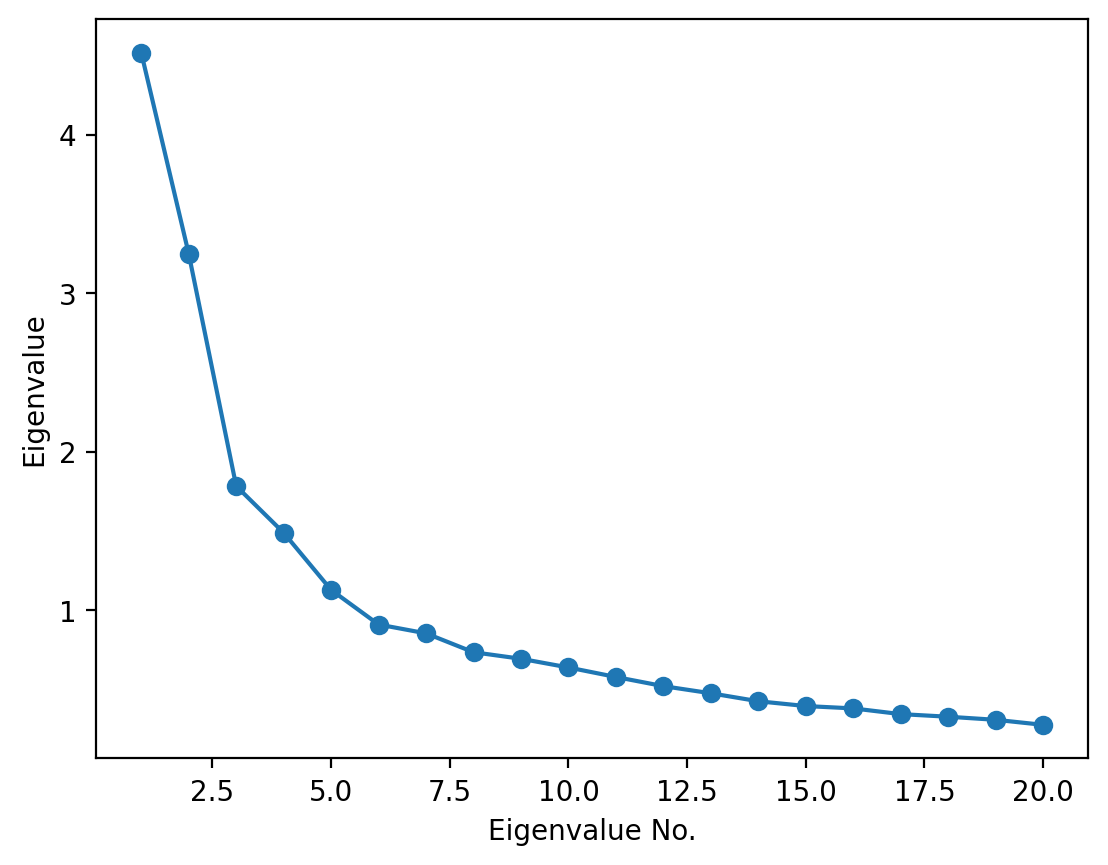

In [ ]:
x = np.array(range(len(ser_eigen_org)))+1
plt.plot(x, ser_eigen_org, marker='o')
plt.xlabel('Eigenvalue No.')
plt.ylabel('Eigenvalue')
plt.show()

#### Factor analysis (n_factors=5)
共通因子数5で因子分析のやり直し 

In [ ]:
fa = FactorAnalyzer(n_factors=5, rotation='promax', method='ml')
fa.fit(df.values)

FactorAnalyzer(method='ml', n_factors=5, rotation_kwargs={})

#### Loadings (因子負荷量)  

In [ ]:
loadings = fa.loadings_
df_loadings = pd.DataFrame(loadings, index=df.columns,
                           columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])
display(df_loadings)

,Factor1,Factor2,Factor3,Factor4,Factor5
基本的にすべての人に親切にするように心がけている,-0.080580,0.826084,-0.070316,0.026687,0.005597
物事を時間通りに終わらせるようにペースを作るのがかなり得意だ,0.361052,0.377157,0.148939,-0.231362,0.005468
人と話をするのはとても楽しい,0.098165,0.574678,-0.271233,0.038968,0.119393
私は心配性ではない,0.476719,0.055629,-0.523855,0.375092,-0.086677
空想にふけって時間を無駄に使うのは嫌だ,0.567111,0.189880,0.142206,0.020785,-0.439997
他人と競争するよりはむしろ協力したい,-0.272773,0.860165,0.128870,0.156218,0.028702
私はあまり几帳面ではない,-0.004587,0.117384,0.125400,0.631799,0.041754
私はあまり陽気ではない,0.122243,-0.152155,0.684679,0.145206,-0.124724
緊張したりびくびくしたりすることが多い,-0.118025,0.081548,0.730568,-0.034930,0.002735
環境に応じて変化する、自分の気分や気持ちには気が付かない,0.279926,0.042989,0.535221,0.189566,-0.083882


#### Scores (因子得点)  

In [ ]:
scores = fa.transform(df)
df_scores = pd.DataFrame(scores, columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])
print(df_scores.shape)
display(df_scores.head())

(272, 5)


,Factor1,Factor2,Factor3,Factor4,Factor5
0,-0.017062,0.196365,-0.419415,-0.443724,0.538246
1,-0.160837,0.327586,-0.121604,0.102503,0.411503
2,-0.842532,0.211033,-0.615835,-0.278370,-0.117997
3,0.181131,0.724078,-0.606727,0.099938,0.504419
4,1.573220,-0.563387,-0.471804,1.777529,0.125612


#### Uniquenesses (独自因子の割合)  

In [ ]:
uniqueness = fa.get_uniquenesses()
ser_uniqueness = pd.Series(uniqueness, index=df.columns)
print(ser_uniqueness)

基本的にすべての人に親切にするように心がけている               0.305405
物事を時間通りに終わらせるようにペースを作るのがかなり得意だ         0.651653
人と話をするのはとても楽しい                         0.570768
私は心配性ではない                              0.347013
空想にふけって時間を無駄に使うのは嫌だ                    0.428079
他人と競争するよりはむしろ協力したい                     0.143877
私はあまり几帳面ではない                           0.569562
私はあまり陽気ではない                            0.456479
緊張したりびくびくしたりすることが多い                    0.444463
環境に応じて変化する、自分の気分や気持ちには気が付かない           0.590360
苦手な人に対しては、つい態度に出てしまうことがある              0.630196
急いでやらなければいけないことがあるのに先延ばしにしてしまうことがある    0.391047
私は生活のテンポが早い                            0.691774
自分の力ではできないことを、誰か他の人に解決してほしいと思うことがある    0.724516
私は好奇心が旺盛である                            0.632993
私は情に流されない                              0.170755
自分の目標を達成するためには努力を惜しまない                 0.652887
リーダーになるよりは、我が道を行きたい                    0.781509
悲しくなったり、落ち込んだりすることはない                  0.528434
理論的なことや抽象的な考えにふけって楽しむことがよくある           0.770458
dtype: float64


#### Contribution of each factor (各共通因子の寄与)  
- Variance: 因子負荷量平方和(因子寄与)  
- Proportion Var: 寄与率  
- Cumulative Var: 累積寄与率

In [ ]:
fa_var = fa.get_factor_variance()
df_fa_var = pd.DataFrame(fa_var,
                         index=['var', 'prop_var', 'cum_var'],
                         columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])
display(df_fa_var)

,Factor1,Factor2,Factor3,Factor4,Factor5
var,2.448374,2.312210,2.294118,1.429037,1.034036
prop_var,0.122419,0.115610,0.114706,0.071452,0.051702
cum_var,0.122419,0.238029,0.352735,0.424187,0.475889


#### biplot 

In [ ]:
def biplot_fa(score_2d, loadings, load_labels=None):
    plt.figure(figsize=(10,10))
    r1 = 1
    r2 = 1
    if load_labels is None:
        load_labels = range(len(loadings))
    for i, coef in enumerate(loadings):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, load_labels[i],
                 color='b', fontsize=10)
    for i in range(len(score_2d)):
        m = '${}$'.format(i)
        plt.scatter(score_2d[i,0], score_2d[i,1], marker=m, s=500, c='k')
    plt.xlabel('F_1')
    plt.ylabel('F_2')
    plt.grid()
    return None

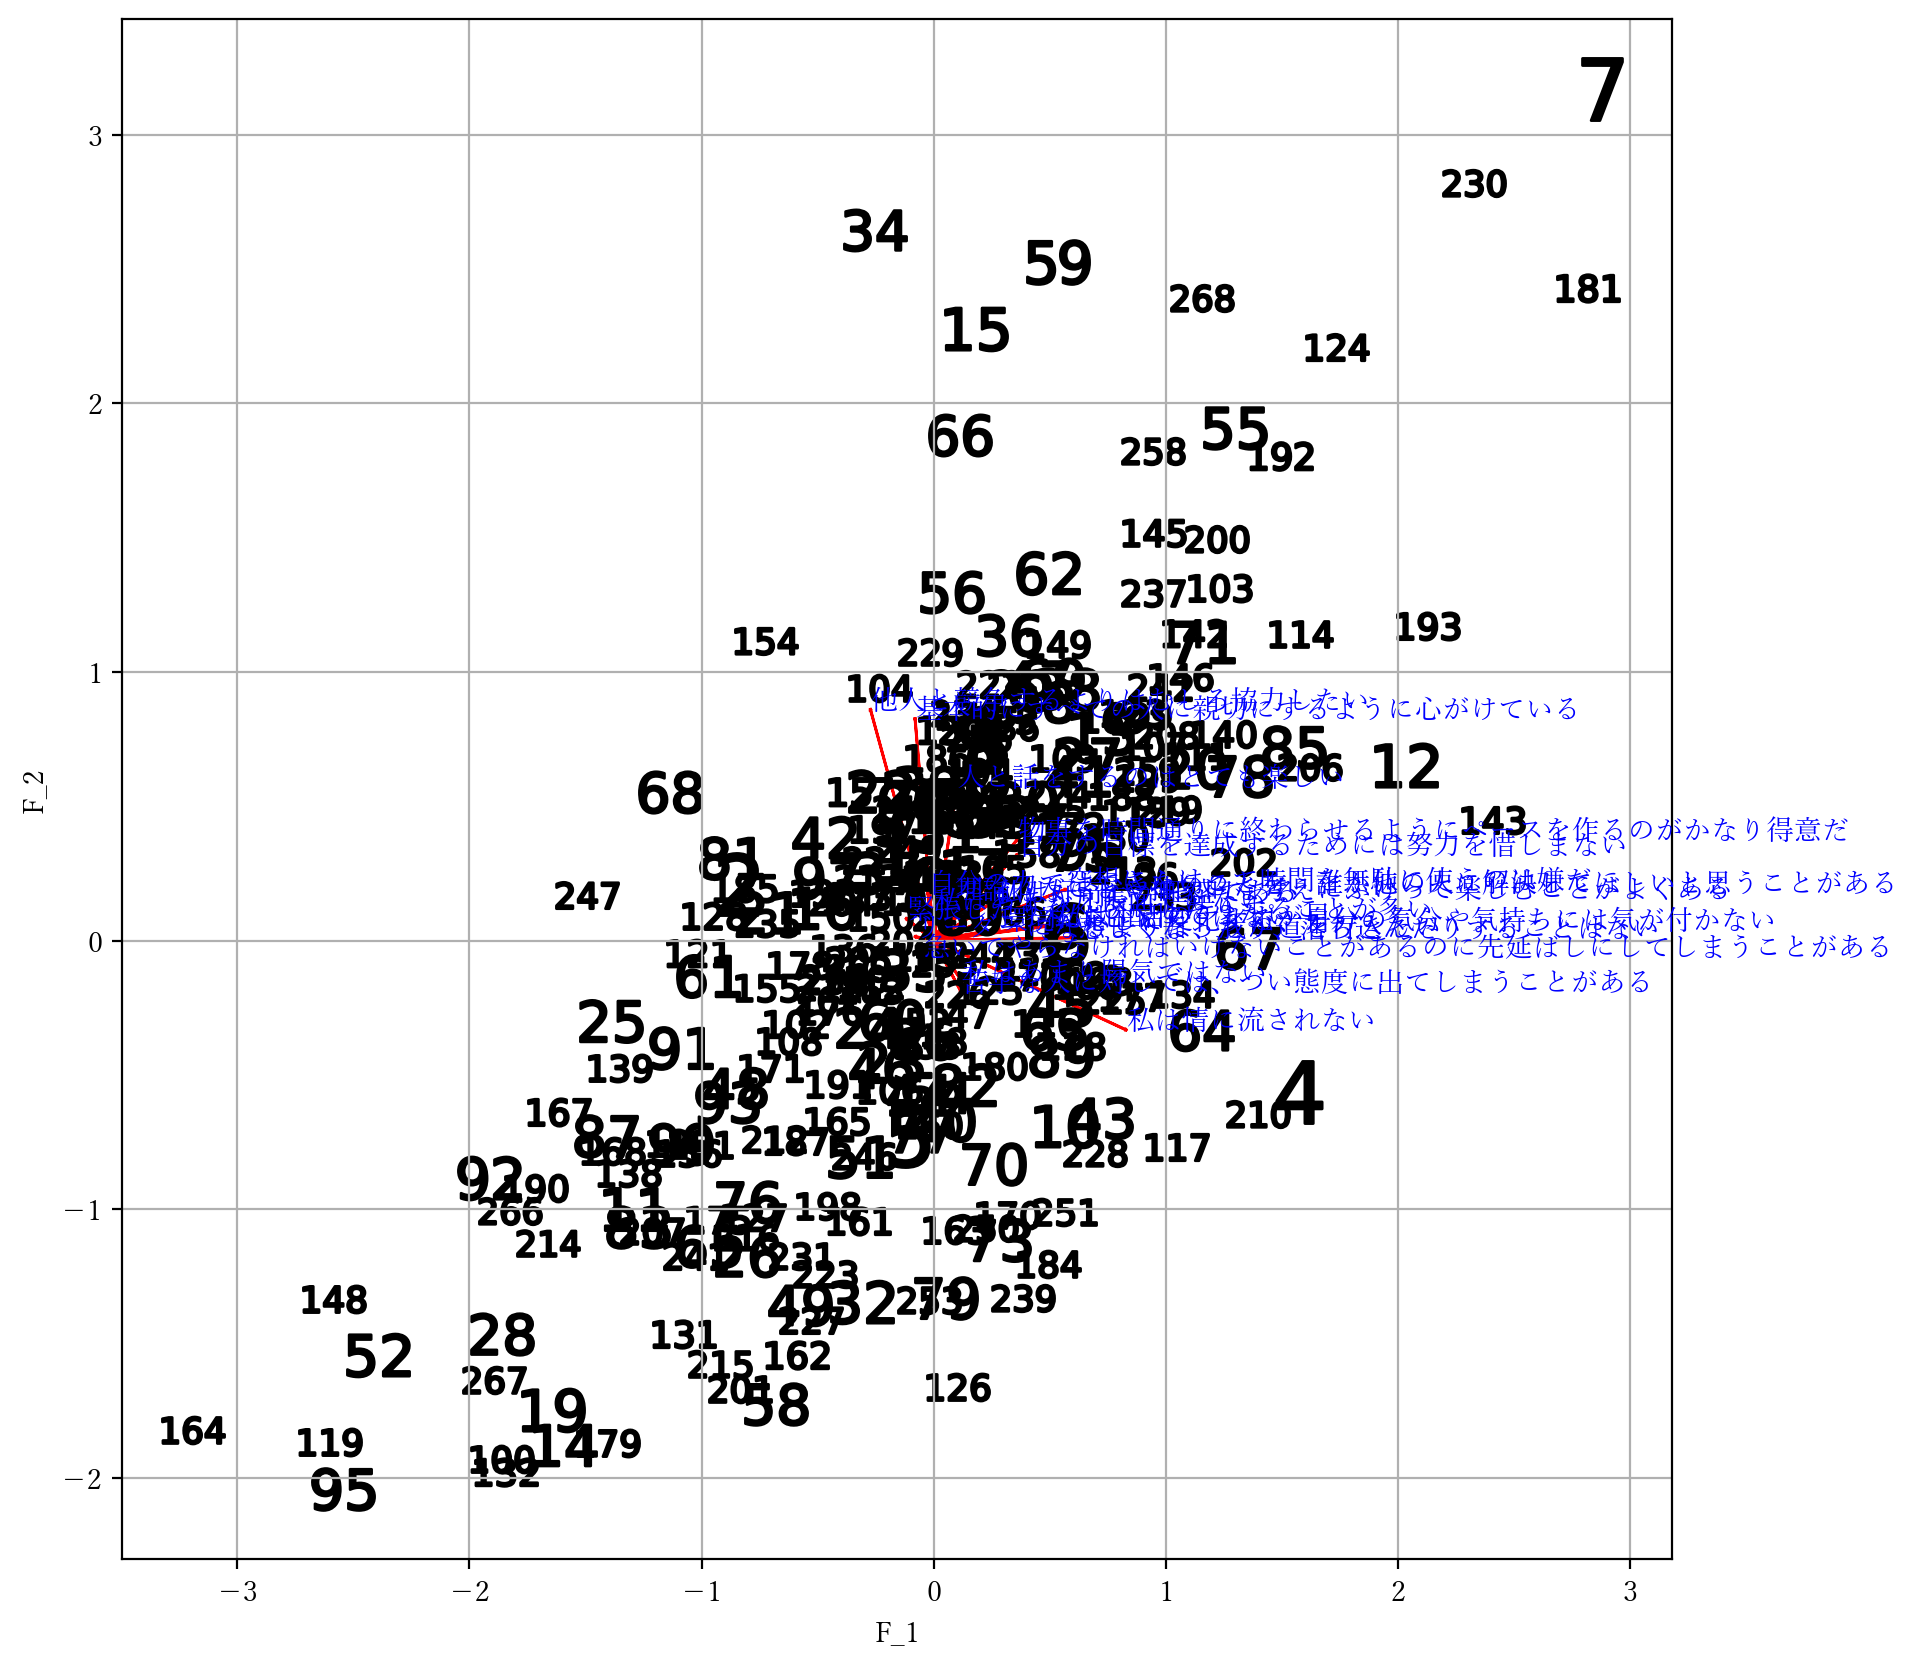

In [ ]:
font = {'family' : 'Yu Mincho'} #Win10環境の場合はこちらを試す
plt.rc('font', **font)

biplot_fa(scores, loadings, load_labels=df.columns)

In [ ]:
results = []
for i in range(1, 6):
    col_name = "Factor{}".format(i)
    variables = df_loadings[col_name].abs().sort_values(ascending=False)[:3].index
    results.append([col_name, ",".join(variables)])

# Dataframe 
df_results = pd.DataFrame(results, columns=["Factor", "Top 3 Variables"])
display(df_results)

,Factor,Top 3 Variables
0,Factor1,"私は情に流されない,悲しくなったり、落ち込んだりすることはない,空想にふけって時間を無駄に使うのは嫌だ"
1,Factor2,"他人と競争するよりはむしろ協力したい,基本的にすべての人に親切にするように心がけている,人と話をするのはとても楽しい"
2,Factor3,"緊張したりびくびくしたりすることが多い,私はあまり陽気ではない,環境に応じて変化する、自分の気分や気持ちには気が付かない"
3,Factor4,"急いでやらなければいけないことがあるのに先延ばしにしてしまうことがある,私はあまり几帳面ではない,私は心配性ではない"
4,Factor5,"私は好奇心が旺盛である,空想にふけって時間を無駄に使うのは嫌だ,理論的なことや抽象的な考えにふけって楽しむことがよくある"
